In [1]:
experiment_name = "ballmapper_analysis"
computer = "ciara"
dataset_name = "MBC"

#ensure current version of hot-mapper is being implemented and home directory is correct for computer,
import sys
sys.path.append(F"C:/Users/{computer}/OneDrive/Documents/GitHub")

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.spatial.distance import correlation

from ciaratools import experiments

from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import cm
import matplotlib.patches as mpatches

from tqdm.notebook import tqdm
from pyballmapper import BallMapper
from pyballmapper.plotting import graph_GUI
from bokeh.plotting import figure, show

from IPython.display import clear_output

C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ciara\anaconda3\envs\clam\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
# this cell allows for bokeh plots to be displayed inside jupyter notebooks
from bokeh.io import output_notebook
output_notebook() #opens in new tab

Loading BokehJS ...

In [4]:
#creating new folder to hold results for experiment in project path 
project_directory = F"C:/Users/{computer}/OneDrive/Documents/PhD File Transfer/Projects/Jurek Orr/MBC/ballmapper/"
output_path = experiments.results_folder(project_directory, experiment_name)

## Load in Male Breast Cancer data 

- Using the 2500 most variable genes dataset 
- provided by Sarah Oct 2019
- 114 Male Breast Cancer patients

In [5]:
#2500 most variable genes in z-score format
X_df_genes = pd.read_csv(F"C:/Users/{computer}/OneDrive/Documents/PhD File Transfer/Data/{dataset_name}/MBC_2500_most_variable.txt", delimiter='\t')
X_df = X_df_genes.T
X = X_df.values
print(X.shape) #patients in rows and genes in features 

(114, 2500)


In [6]:
X_df

,PI15,IL6ST,IGFBP5,COL1A1,FN1,SLC39A6,COL3A1,TRPS1,NPY1R,COL1A2,...,DSC2,STARD13,PFKFB3,LTF,LURAP1L,ITGB5,SKA2,FREM2,ATRN,AK3
E750001,-0.537413,0.100413,1.461142,0.334775,-0.067076,-0.490979,0.382364,-0.899712,-0.289416,0.127066,...,2.643893,-0.849926,-0.439467,-0.358580,-0.516559,-0.720118,3.320678,0.933627,1.361949,0.843666
E750002,-0.543927,1.245083,4.310890,0.153717,-0.070122,-0.707912,0.464345,2.346847,-0.352663,0.866365,...,-0.911362,1.734135,-0.871835,-0.463183,1.560143,0.568948,0.238705,-0.313811,1.002947,0.200260
E750003,2.005215,-0.641295,-0.647006,-1.134129,-1.235485,-0.478624,-1.109688,-0.644721,-0.429357,-1.139349,...,-0.920072,-0.191015,-1.010532,-0.085881,-0.329874,-1.503951,-0.686943,-0.343153,-0.327843,-1.275504
E750004,-0.520819,-0.574606,-0.425321,0.619539,1.533268,-0.733167,-0.072765,-0.550931,-0.396787,0.394190,...,-0.695316,-0.081680,0.913425,-0.250429,-0.883188,1.156123,-0.592004,-0.417998,-0.424075,-0.891293
E750005,-0.538356,-0.744217,-0.373130,0.421494,0.889184,-0.452832,0.451258,-0.635213,-0.310776,0.238174,...,0.384518,-0.973360,-0.479774,-0.393753,1.893592,-0.311821,0.490881,-0.421554,-0.846839,-0.880029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E750141,-0.542202,-0.867596,-0.480897,0.246426,0.521071,-0.732803,0.000785,-0.989853,-0.416959,0.201974,...,-1.065088,-0.969815,0.082506,-0.373208,-0.471136,0.410265,-1.178048,-0.455386,-1.283243,-0.899010
E750142,4.871940,2.305676,2.605726,-1.302292,-1.180092,1.933210,-1.272107,-0.645426,-0.358291,-1.249023,...,1.970788,2.242852,-0.568026,0.270423,0.070625,-0.258312,-0.852095,-0.509327,0.655909,-0.318047
E750143,-0.332875,0.126066,-0.238603,1.340525,0.945166,5.092889,1.402871,-0.644419,2.827001,1.115721,...,1.282617,-0.201138,-0.351754,-0.367861,-0.444413,0.030258,1.161892,-0.510723,1.960828,1.091627
F29_0005,0.619630,0.525843,-0.485476,-0.604079,-0.619324,0.702410,-0.606439,-0.587989,-0.400298,0.181550,...,-0.664291,-0.488099,-0.493875,0.565486,-0.505338,1.000885,0.716551,-0.452115,-0.315459,-0.476807


### M1 / M2 subtypes 

Using BallMapper on the M1M2 genes, we identified two obvious clusters. Manually setting eps = 0.647 we labelled the 114 MBC samples. We can now use these labels to colour the BallMapper built on 2500 variable genes

In [7]:
m1m2 = pd.read_csv(F"C:/Users/{computer}/OneDrive/Documents/PhD File Transfer/Data/{dataset_name}/m1m2_labels_eps-0.647.txt",  delimiter='\t')

In [8]:
#include important information to colour graph with
y = pd.DataFrame({"ID": X_df.index, "M1M2" : m1m2.M1M2_clusters})

In [9]:
y

,ID,M1M2
0,E750001,1
1,E750002,0
2,E750003,2
3,E750004,1
4,E750005,1
...,...,...
109,E750141,1
110,E750142,2
111,E750143,1
112,F29_0005,0


## Create BallMapper graph

after some exploratory analysis, correlation distance and eps = 0.68 was identified to show three clusters. I selected 0.68 as the epsilon value before the two clusters conjoin, minimizing the number of outliers.

Two of these clusters can be explained as the M1 / M2 subtypes, but one cluster is a mixture of both and is therefore a potentially novel subgroup of interest

In [10]:
eps = 0.68
bm = BallMapper(points = X, # the pointcloud, as a numpy array
                    epsilon = eps,
                    distance = correlation,
                    dbg=True) # the radius of the balls

bm.add_coloring(coloring_df=pd.DataFrame(y, columns=['M1M2']))
clear_output() # newer versions of pandas produce a lot of warings when I launch the above function :)
my_palette = cm.get_cmap(name='plasma')

bm_gui = graph_GUI(bm.Graph,
                          my_palette,
                          tooltips_variables=['M1M2'])
bm_gui.color_by_variable('M1M2')
show(bm_gui.plot)


color by variable M1M2 
MIN_VALUE: 0.000, MAX_VALUE: 2.000


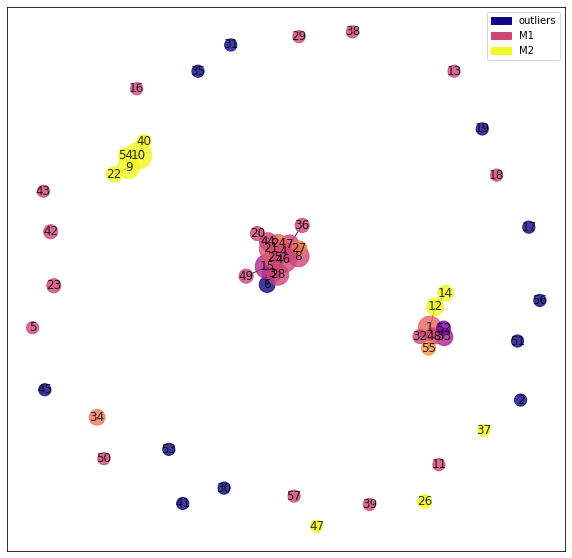

In [11]:
plt.figure(figsize = (10,10))
bm.draw_networx(coloring_variable='M1M2', color_palette=my_palette)

#label the samples by the M1/M2 labels
cmap = cm.get_cmap('plasma', 3) 
bound = np.linspace(0, 1, 4)
labels = ["outliers", "M1", "M2"]
plt.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
           ['{}'.format(labels[i]) for i in range(3)])

plt.show()


## Create labels for the three clusters 

We now create labels for the three clusters found in this BallMapper graph - M1 / M2 / Cluster of interest + outliers built on the 2500 most variable genes

In [12]:
def component_samples(nodes):
    """return a set of all the unique samples covered by the connected node clusters in BallMapper"""
    long_node_list = [bm.points_covered_by_landmarks[i] for i in nodes]
    flat_list = [item for sublist in long_node_list for item in sublist]
    return set(flat_list)

def label_large_clusters(bm_graph):
    """Return a list of labels for the large clusters found in the BallMapper graph. 
    Samples labelled 0 are outliers"""
    
    C = nx.connected_components(bm_graph)
    S = [bm_graph.subgraph(c).copy() for c in nx.connected_components(bm_graph)]
    S_nodes = [(i.nodes) for i in S]
    #identify clusters with more than one node
    count = 0
    cluster_labels = [0] * len(X)
    print("(check labels match interactive BallMapper)")
    for i in S_nodes:
        if len(i) > 2:
            count += 1
            samples = component_samples(i)
            print(count,i, samples, len(samples))
            for s in samples:
                cluster_labels[s] = count 
    return cluster_labels


In [13]:
#label clusters to see how they correspond to reverse ordering and various radii
labels = label_large_clusters(bm.Graph)
y["clusters"] = labels

(check labels match interactive BallMapper)
1 [32, 1, 33, 12, 14, 48, 52, 55] {0, 11, 13, 25, 26, 28, 29, 30, 48, 57, 58, 61, 71, 76, 84, 89, 94, 95, 106, 111} 20
2 [3, 4, 36, 6, 7, 8, 44, 46, 15, 49, 20, 21, 24, 25, 27, 28] {2, 3, 5, 6, 7, 14, 15, 16, 22, 23, 24, 32, 34, 37, 38, 40, 41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 63, 74, 75, 78, 85, 87, 91, 93, 97, 98, 99, 101, 103, 105, 109} 41
3 [40, 9, 10, 54, 22] {8, 9, 21, 27, 31, 33, 36, 39, 54, 64, 67, 70, 72, 73, 79, 82, 83, 90, 92, 110} 20


In [14]:
label_dict = {0:"outliers",1:"Cluster of interest",2:"M1",3:"M2"}

In [15]:
for i in y.clusters.value_counts().index:
    print(f"{label_dict[i]} = {y.clusters.value_counts()[i]} samples")

M1 = 41 samples
outliers = 33 samples
Cluster of interest = 20 samples
M2 = 20 samples


In [16]:
bm.add_coloring(coloring_df=pd.DataFrame(y))
clear_output()

bm_gui = graph_GUI(bm.Graph,
                          my_palette,
                          tooltips_variables=['clusters'])
bm_gui.color_by_variable('clusters')
show(bm_gui.plot)


color by variable clusters 
MIN_VALUE: 0.000, MAX_VALUE: 3.000


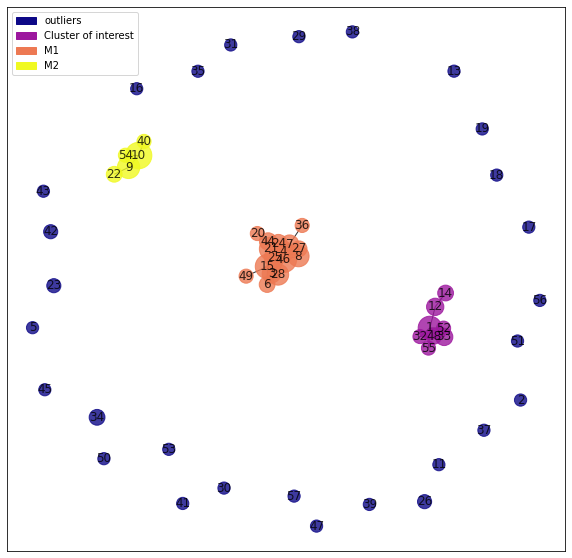

In [17]:
plt.figure(figsize = (10,10))
bm.draw_networx(coloring_variable='clusters', color_palette=my_palette)

#label the samples by the M1/M2 labels
cmap = cm.get_cmap('plasma', 4) 
bound = np.linspace(0, 1, 5)
labels = ["outliers", "Cluster of interest", "M1", "M2"]
plt.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
           ['{}'.format(labels[i]) for i in range(4)])

plt.show()


- outliers = blue
- M1 = orange
- M2 = yellow
- Cluster of interest = pink

## Pick the optimal epsilon value for BallMapper

In [18]:
output = {}

# array of radii
radii_list =[i/40.0 for i in range(1, 41)]
print(f"Radii list: {radii_list}")
is_sorted = lambda a: np.all(a[:-1] <= a[1:])
assert(is_sorted(radii_list))

# run BM on the first radius
cc_dict = {}
bm = BallMapper(points = X,     # the pointcloud, as a numpy array
                epsilon = radii_list[0],
               distance = correlation)  # the radius of the balls

# iterate through a sorted list of connected components, largest first.
for i, cc in enumerate(sorted(nx.connected_components(bm.Graph), key=len, reverse=True)):
    # for each connected components, find the set of points covered by its nodes
    points_in_cc = set().union(*[bm.points_covered_by_landmarks[idx] for idx in cc])
    cc_dict[i] =  points_in_cc

output[radii_list[0]] = cc_dict

# run BM for the other radii and keep track of how the connected components
# evolve
for i, eps in enumerate(radii_list[1:], start=1):
    cc_dict = {}
    bm = BallMapper(points = X,     # the pointcloud, as a numpy array
                    epsilon = eps,
                   distance = correlation)  # the radius of the balls

    # in order to be consistent with the naming, look for cc in the previous BM
    # that contains some of the points in the current cc
    # iterate through a sorted list of connected components, largest first.
    for cc in sorted(nx.connected_components(bm.Graph), key=len, reverse=True):
        # for each connected components, find the set of points covered by its nodes
        points_in_cc = set().union(*[bm.points_covered_by_landmarks[idx] for idx in cc])
        # look for the first cc in the previous bm that is a subset of the current cc
        # this will be the name for our current cc
        for old_cc_name in sorted(output[radii_list[i-1]].keys()):
            if output[radii_list[i-1]][old_cc_name].issubset(points_in_cc):
                break
        cc_dict[old_cc_name] =  points_in_cc

    output[eps] = cc_dict

Radii list: [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]


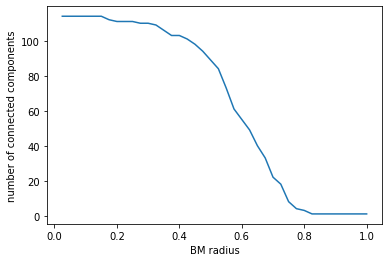

In [19]:
# lets see how the number of cc varies
fig, ax = plt.subplots()

ax.plot(radii_list, [len(output[eps].keys()) for eps in output])

ax.set_xlabel('BM radius')
ax.set_ylabel('number of connected components')
plt.show()

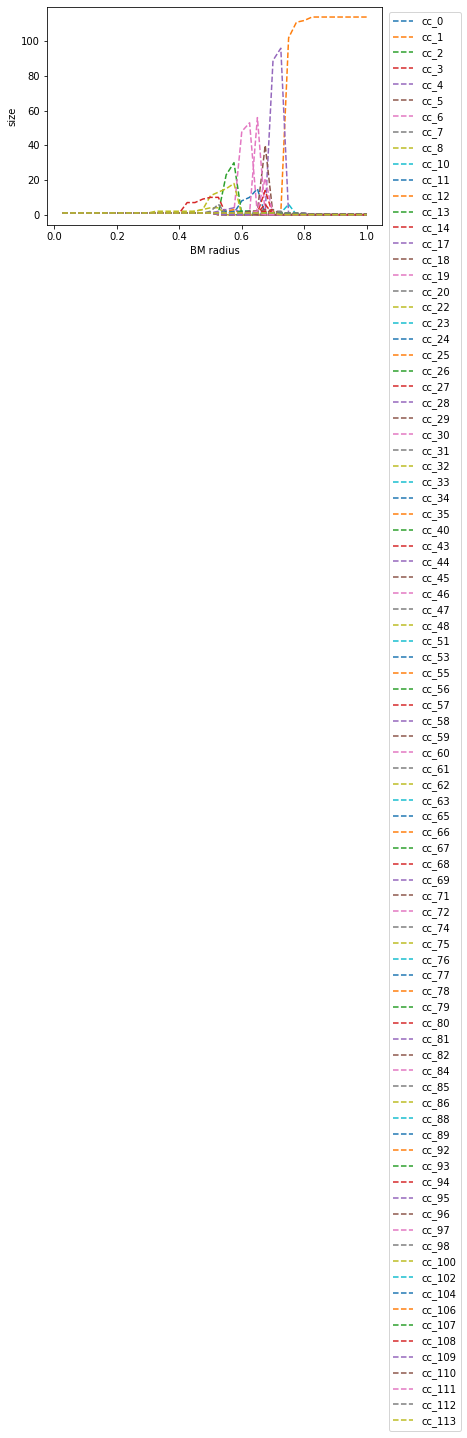

In [20]:
## MIN EPSILON = 0.5

fig, ax = plt.subplots()

# we plot the size of the cc that survive at least till min_eps = 0.5
min_eps = 0.5
for cc_id in sorted(output[min_eps].keys()): 
    ax.plot(radii_list, [len(output[key].get(cc_id, [])) for key in output],
            label = 'cc_{}'.format(cc_id), linestyle='dashed')

ax.set_xlabel('BM radius')
ax.set_ylabel('size')

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

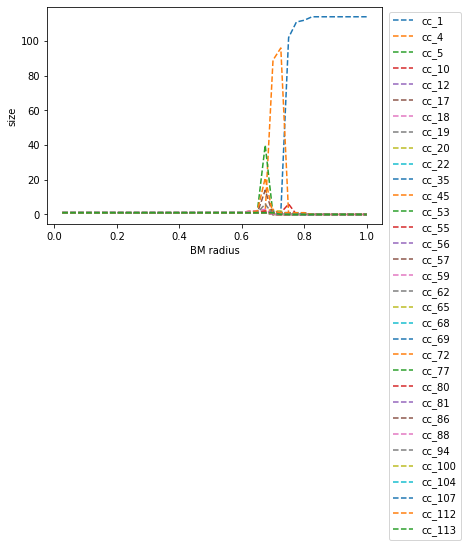

In [21]:
## MIN EPSILON = 0.675

fig, ax = plt.subplots()

# we plot the size of the cc that survive at least till min_eps = 0.5
min_eps = 0.675
for cc_id in sorted(output[min_eps].keys()): 
    ax.plot(radii_list, [len(output[key].get(cc_id, [])) for key in output],
            label = 'cc_{}'.format(cc_id), linestyle='dashed')

ax.set_xlabel('BM radius')
ax.set_ylabel('size')

ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

In [22]:
## this are the ids of the clusters at different radii
## note that the clusters id are integers, not cc_i !! 
for k in output:
    print(f"radii = {k}\ncc_id = {output[k].keys()}\n\n")

radii = 0.025
cc_id = dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113])


radii = 0.05
cc_id = dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113])


radii = 0

In [23]:
## we can have a look at the size of all connected-components identified for each radii value

for k in output:
    print(f"radii = {k}")
    
    cc_id_size = []
    for cc_id in output[k]:   
        cc_id_size.append(len(output[k][cc_id]))
    
    print(f"\nsize of cc_id = {[cc_id_size]}\n\n")

radii = 0.025

size of cc_id = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


radii = 0.05

size of cc_id = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


radii = 0.075

size of cc_id = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,